## Praktische Aufgaben – Blatt 3

In [104]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.typing as npt
from typing import List

Im Folgenden laden wir einen klassischen, aber veränderten Datensatz.

Die Daten findet ihr in `data`. Die erste Dimension (Zeilen) enthält alle Samples und die zweite (Spalten) die vier Merkmale. Die Klasse für jedes der 105 Samples findet ihr in `target`.

In [106]:
dataset = np.loadtxt("Dataset.csv", delimiter=',', skiprows=1)
np.random.shuffle(dataset)

data = dataset[:, :-1]
target = dataset[:, -1]
print(data.shape, np.unique(target))

(105, 4) [0. 1. 2.]


**Achtung**: In diesem Übungsblatt nutzen wir alle drei Klassen, nicht wie in Blatt2 nur die ersten beiden.

### Aufgabe 1: k-Means
Die folgenden Aufgaben befassen sich mit VL 09 Teil 2 und Teil 3

**1.** Implementiert den k-Means Algorithmus, indem ihr in der folgenden Klasse die drei Funktionen `distance`, `fit` und `predict` vervollständigt:
- `distance` berechnet die euklidische Distanz zwischen `sample` und `center`.
_Erinnerung_: $eukl = \sqrt{(x2_0 - x1_0)^2 + ... + (x2 - x1_n)^2}$.
- `predict` findet für jedes Sample dasjenige Clusterzentrum, das ihm am nächsten ist und ordnet das Sample dem entsprechenden Cluster zu.
- Und `fit` findet basierend auf `predict`'s Zuordnungen die besten Cluster durch iteratives Minimieren der Distanzen zwischen Samples und Clusterzentren.

`X` sind übrigens Daten mit den Dimensionen $m \times n$, wobei $m$ Samples und $n$ Merkmale sind.

Nutzt außer `numpy` keine weiteren Pakete.

_Hinweis_: den Algorithmus findet ihr in VL 09, Teil 2, Folie 6.

In [107]:
class K_Means ():
    def __init__ (self, k: int, n_iterations: int = 2) -> None:
        self.k = k
        self.n_iterations = n_iterations
    
    def distance(self, sample: npt.NDArray, center: npt.NDArray) -> float:
        """Berechnung der euklidischen Distanz zwischen sample und center"""  
        
        # YOUR CODE HERE
        sum=0
        for i in range(len(sample)):
            sum += pow(sample[i]-center[i], 2)
        
        
        return np.sqrt(sum)
    
    def fit(self, X: npt.NDArray) -> None:
        """ Berechnung der besten Cluster durch iterative
        Minimierung der Distanz jedes Samples zu seinem Clusterzentrum
        """
        
        # Initialisierung der Zentren durch Ziehen eines zufälligen Samples
        self.centers = np.random.default_rng().choice(X, size=self.k, replace=False)
         
        for _ in range(self.n_iterations):
            
            # Zuordnung jedes Samples zum Cluster mit geringster Entfernung
            clusters = self.predict(X)
            
            # Berechnung neuer Zentren: Durchschnitt aller Samples in einem Cluster
            self.centers = []

            
            # YOUR CODE HERE
            
            for i in range(self.k):
                new_center = []
                for n in range(len(X[0])):
                    new_cluster = X[np.array(clusters) == i, n]
                    new_center.append(np.mean(new_cluster))
                self.centers.append(new_center)

            
    def predict(self, X: npt.NDArray) -> List[int]:
        """ Zuweisung jedes Samples zu dem Cluster (0..k-1), 
        dessen Zentrum dem Sample am nächsten ist.
        """

        # YOUR CODE HERE
        closest_centers = []
        for sample in X:
            min_distance = self.distance([1,1], [0,1])
            closest_center_index = 0
            
            for i in range(len(self.centers)):
                distance2 = self.distance(np.array(sample), np.array(self.centers[i]))
                if distance2 < min_distance:
                    min_distance = distance2
                    closest_center_index = i
            closest_centers.append(closest_center_index)        
        return closest_centers

Hier einige Sanity checks, ob eure k-Means Klasse das tut, was sie tun sollte...

In [108]:
k_means = K_Means(k=2, n_iterations=1)

# Einfacher Distanz Test
assert k_means.distance(np.array([1, 1]), np.array([2, 1])) == 1.0

# Einfacher Cluster Test
test_data = np.array([[1, 1], [2, 2]])
k_means.fit(test_data)
assert k_means.predict(test_data) in [[0, 1], [1, 0]]

**2.** Trainiert nun eure K-Means Klasse mit den gegebenen Daten (`data`). Sollte es Probleme bei der Implementierung gegeben haben, könnt ihr hier den K-Means aus SKlearn nutzen (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [109]:
# YOUR CODE HERE
k_means = K_Means(k=3)
k_means.fit(data)
predictions = k_means.predict(data)

print(predictions)

[2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1]


**3.** Clustert die Daten, plottet die Samples mithilfe einer geeigneten Methode und färbt die Samples gemäß Ihres Clusterings ein.

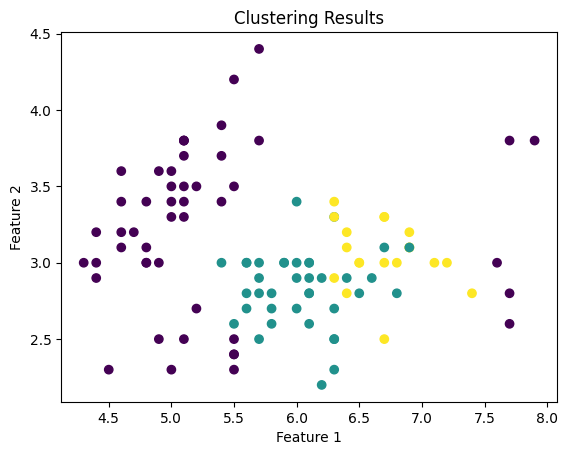

In [110]:
cluster_pred = []

# YOUR CODE HERE
cluster_pred = predictions

plt.scatter(data[:, 0], data[:, 1], c=cluster_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

**4.** Führt das Training, Clustering und Plotten mehrfach aus. Die Cluster wechseln immer wieder durch, woran liegt dies?


Die Cluster können sich ändern, wenn der Code mehrmals ausgeführt wird, wegen der zufälligen Initialisierung der Clusterzentren in der fit-Methode. Diese zufällige Initialisierung kann zu unterschiedlichen Startpunkten führen und daher die endgültige Clusterbildung beeinflussen.

**5.** Was erwartet ihr, wenn ihr `k!=3` oder `n_iterations=1` wählt?


Wenn man für k einen anderen Wert als 3 wählt, versucht der Algorithmus, die Daten in k Cluster zu unterteilen. Wenn man k beispielsweise auf 2 setzt, dann versucht der Algorithmus, zwei Cluster in den Daten zu finden.

Wenn man n_iterations auf 1 setzt, bedeutet das, dass der Algorithmus eine einzelne Iteration der Aktualisierung durchführt, bei dem Samples den nächstgelegenen Clusterzentren zugewiesen werden und dann die Zentren neu berechnet werden. Dadurch wird die Clusterzuweisung grober als wenn man mehrere Iterationen durchführt.

### Aufgabe 2: Gaussverteilungen

Im Folgenden wollen wir nun basierend auf unserem k-Means-Clustering Gaussverteilungen trainieren. 
Dies ist angelehnt an die GMM-Initalisierung mithilfe von k-Means. Grundsätzlich ist k-Means aber für das Training von Gaussverteilungen nicht nötig, da diese eine eindeutige Lösung haben.

**1.** In der folgenden Berechnung für die Wahrscheinlichkeit eines Samples einer Gaussverteilung hat sich ein Fehler eingeschlichen.
Korrigiert diesen (siehe VL 10, Teil 2).

In [112]:
# def gaussian_pdf(x, mu=0, variance=1):
#     return 1/(variance) * np.exp(-1/(2 * variance) * (x)**2)

# YOUR CODE HERE
def gaussian_pdf(x, mu=0, variance=1):
    return 1/(np.sqrt(2 * np.pi * variance)) * np.exp(-1/(2 * variance) * (x - mu)**2)

Zum Vergleich: der folgende Code entspricht der grünen Verteilung auf Folie 6.

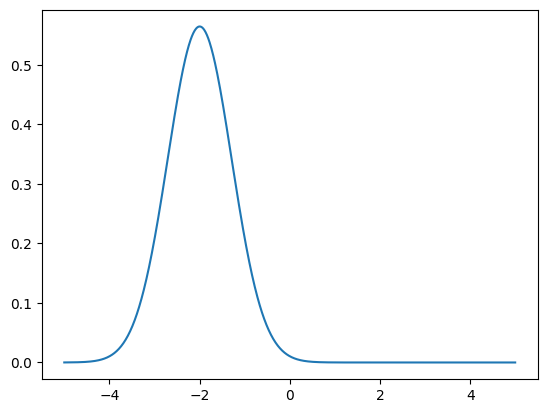

In [113]:
x = np.arange(-5, 5, 0.01)
y = [gaussian_pdf(t, mu=-2, variance=0.5) for t in x]
plt.plot(x, y)

# Euer Ergebnis wird automatisch getestet.

**2.** Berechnet nun für jedes eurer oben bestimmten Cluster Mittelwert `mu` und Varianz `var` auf dem dritten(!) Merkmal (also `feature = 2`) und speichert diese.

_Hinweis_: Wir verwenden hier nur eine Dimension um die Gaussverteilungen nicht zu sehr zu verkomplizieren. In der realen Welt sind dies jedoch meist mehrdimensionale Vektoren.

In [114]:
feature = 2

parameters = [] # tuples with (mu, variance)

# YOUR CODE HERE

for i in range(k_means.k):
    cluster_samples = data[np.array(predictions) == i, feature]  # Extrahiere die Samples des dritten Features im aktuellen Cluster
    cluster_mean = np.mean(cluster_samples)  # Berechne den Mittelwert des dritten Merkmals im aktuellen Cluster
    cluster_variance = np.var(cluster_samples)  # Berechne die Varianz des dritten Merkmals im aktuellen Cluster
    parameters.append((cluster_mean, cluster_variance))

print("Cluster Means/Variances:", parameters)


Cluster Means/Variances: [(2.377083333333333, 2.9225998263888893), (4.63157894736842, 0.12584487534626032), (5.621052631578948, 0.06376731301939058)]


In [115]:
# Euer Ergebnis wird automatisch getestet.

**3.** Plottet die drei Gaussverteilungen. Fügt außerdem das dritte Merkmal der Datenpunkte in den Plot ein. 

_Hinweise_: Die Farben zwischen Gaussverteilung und Daten müssen nicht übereinstimmen. Um die Datenpunkte einzufügen, könnt ihr für y-Werte Nullen verwenden.

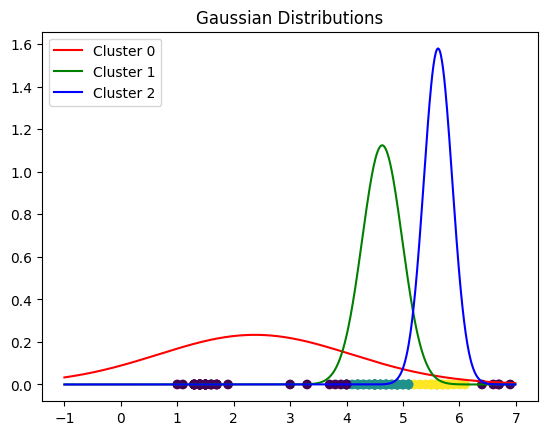

In [116]:
x = np.arange(-1, 7, 0.01)

# YOUR CODE HERE
colors = ['r', 'g', 'b']

plt.figure()

for i, (mu, variance) in enumerate(parameters):
    y = gaussian_pdf(x, mu, variance)
    plt.plot(x, y, color=colors[i], label=f'Cluster {i}')

# Datenpunkte einfügen
plt.scatter(data[:, 2], np.zeros_like(data[:, 2]), c=cluster_pred)

plt.title('Gaussian Distributions')
plt.legend()
plt.show()

**Vergleichsplot**

![cluster.png](cluster.png)

**4.** Berechnet für alle drei Gaussverteilungen die Wahrscheinlichkeit, dass das erste Sample aus dieser Verteilung kommt.

In [117]:
sample = data[0, feature]
probabilities = []

# YOUR CODE HERE
for i, (mu, variance) in enumerate(parameters):
    prob = gaussian_pdf(sample, mu, variance)  # Calculate the probability using the Gaussian PDF
    probabilities.append(prob)

print(probabilities)

[0.06563713704059615, 0.4703083876382514, 0.1879682340483499]


In [118]:
# Euer Ergebnis wird automatisch getestet.

**5.** Wenn ihr die Wahrscheinlichkeiten aufsummiert, kommt nicht eins heraus. Warum?


Die berechneten Wahrscheinlichkeiten ergeben nicht 1, da der Code die Wahrscheinlichkeiten für jedes Cluster unabhängig berechnet und nicht normalisiert.

**6.** Wir wollen nun einen einfachen Klassifikator bauen. Wir betrachten dafür wieder nur das dritte(!) Merkmal. Berechnet für jedes Sample in den Daten die wahrscheinlichste Gaussverteilung.

_Hinweis_: Falls ihr ChatGPT nutzt, validiert den Code und passt ihn an, sodass er effizienter ist.

In [119]:
target_prediction = []

# YOUR CODE HERE

for sample in data:
    probabilities = []

    for i, (mu, variance) in enumerate(parameters):
        prob = gaussian_pdf(sample[2], mu, variance)  # Calculate the probability using the Gaussian PDF for the third feature
        probabilities.append(prob)

    # Find the index of the maximum probability
    max_prob_index = np.argmax(probabilities)
    target_prediction.append(max_prob_index)

print(target_prediction)


[1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1]


In [120]:
print(
    'Train Accuracy:',
    np.count_nonzero(np.array(cluster_pred) == np.array(target_prediction)) / len(cluster_pred)
)

Train Accuracy: 0.9523809523809523


In [121]:
# Euer Ergebnis wird automatisch getestet.

**7.** Obwohl wir die selben Daten klassifizieren, mit denen wir trainiert haben, ist die Akkuratheit ziemlich schlecht.  
1. Woran könnte das liegen? Nennt 2 Gründe.  
2. Was sagt die Akkuratheit aus, wenn wir auf den exakt selben Daten trainiern und klassifizieren?


1. Eine Accuracy von <100% sagt aus, dass das Modell nicht overfittet. Overfitting tritt auf, wenn ein Modell noise und die zufälligen Variationen in den Trainingsdaten lernt und nicht die wahren zugrunde liegenden Muster. Infolgedessen ist das Modell zu sehr auf die Trainingsdaten spezialisiert und lässt sich möglicherweise nicht gut auf unbekannte Daten verallgemeinern. Die geringe Accuracy könnte außerdem darauf zurückzuführen sein, dass das ausgewählte Feature (in diesem Fall das dritte) möglicherweise nicht genügend Informationen enthält, um genau zwischen den verschiedenen Klassen zu unterscheiden.

2. Da das Modell während des Trainingsprozesses bereits die in den Trainingsdaten vorhandenen Muster und Beziehungen gelernt hat, ist zu erwarten, dass es mit denselben Daten, mit denen es trainiert wurde, eine hohe Accuracy erbringt. Dadurch ist die Accuracy nicht wirklich aussagekräftig, bis man es mit unbekannten Daten füttert.